In [ ]:
# Requirements

%pip install -q ipywidgets
%pip install -q plotly
%pip install -q numpy

In [ ]:
# Test showing plots

import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

out_neg = pd.read_csv('benchmark_out/out_neg.csv')
out = pd.read_csv('benchmark_out/out.csv')
synthetic = pd.read_csv('benchmark_out/synthetic.out')

def graphDataQuality(table, x_name='formulaSize'):
    xs = table[x_name].unique()
    xs.sort()
    xs = list(range(xs[0], xs[-1]+1))

    countsPerSize = [len(table[table[x_name]==x]) for x in xs ]
    fig = go.Figure(go.Scatter(x=xs, y=countsPerSize, name="formulas count"))
    fig.show()

# display(out_neg.describe())
# display(out.describe())

graphDataQuality(out_neg)
graphDataQuality(synthetic)

In [ ]:
def graphColsMean(table, x_name='formulaSize', ys=["timeTStarMs", "timeLabelMs"], yLog=True):
    xs = table[x_name].unique()
    xs.sort()
    xs = list(range(xs[0], xs[-1]+1))
    
    fig = go.Figure()
    for y_name in ys:
        fig.add_trace(go.Scatter(x=xs, y=[ table[table[x_name]==x][y_name].mean() for x in xs ], name=y_name))
    
    if yLog:
        fig.update_yaxes(type="log")

    fig.update_layout(autosize=True, height=500) 
    fig.show()

In [ ]:
graphColsMean(out)
graphColsMean(out_neg)
graphColsMean(synthetic)

In [ ]:
syntheticTaut = synthetic[synthetic["formulaIsTautology"]==1]
graphDataQuality(syntheticTaut)
graphColsMean(syntheticTaut)

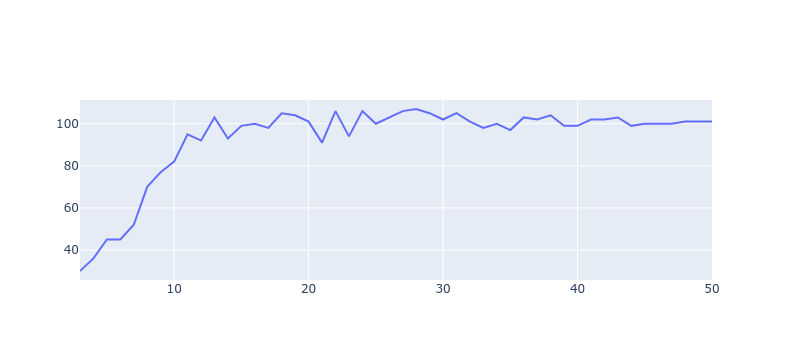

In [18]:
synthetic.head()

synthetic3 = synthetic[(~synthetic["formula"].str.contains("s"))]
synthetic2 = synthetic3[~synthetic3["formula"].str.contains("r")]
synthetic1 = synthetic2[~synthetic2["formula"].str.contains("q")]

# graphDataQuality(synthetic3)
# graphDataQuality(synthetic2)
# graphDataQuality(synthetic1)

# graphColsMean(synthetic)
# graphColsMean(synthetic3)
# graphColsMean(synthetic2)
# graphColsMean(synthetic1)

syntheticTautPQR = synthetic[(~synthetic["formula"].str.contains("s")) &
    (synthetic["formula"].str.contains("r")) &
    (synthetic["formula"].str.contains("q")) &
    (synthetic["formula"].str.contains("p")) &
    (synthetic["formulaIsTautology"]==1)]

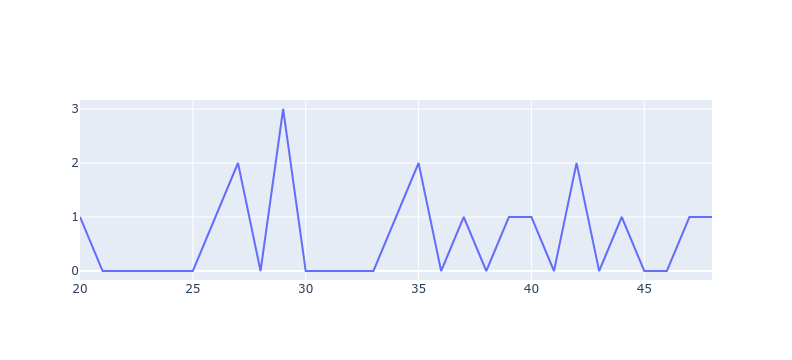

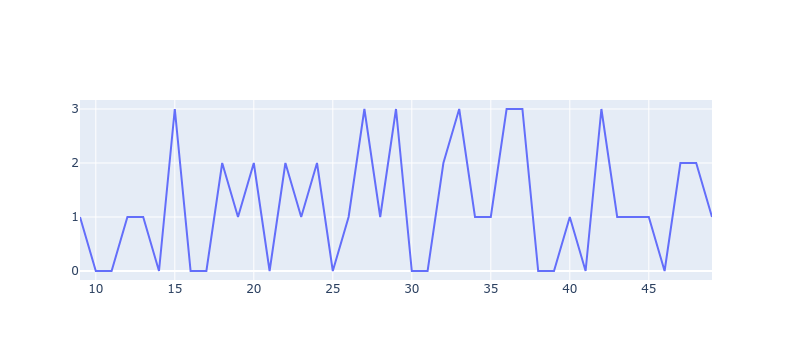

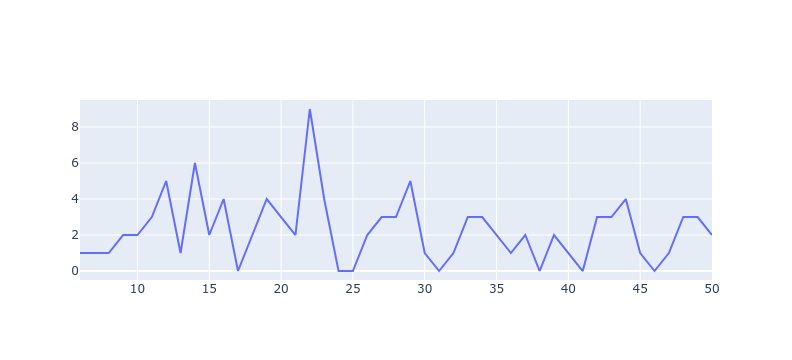

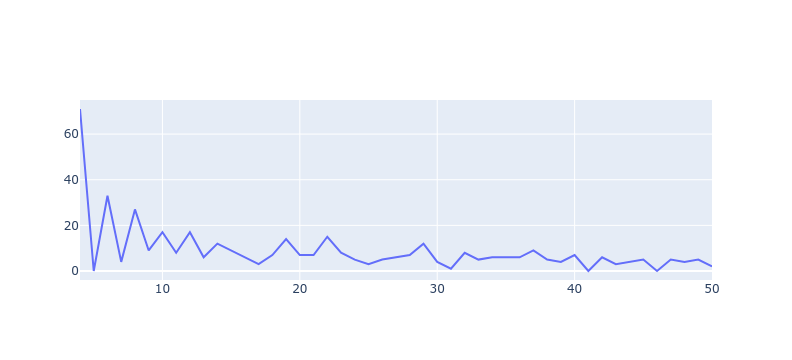

In [24]:
syntheticTautPQRS = synthetic[(synthetic["formula"].str.contains("s")) &
    (synthetic["formula"].str.contains("r")) &
    (synthetic["formula"].str.contains("q")) &
    (synthetic["formula"].str.contains("p")) &
    (synthetic["formulaIsTautology"]==1)]

graphDataQuality(syntheticTautPQRS)


syntheticTautPQR = synthetic[(~synthetic["formula"].str.contains("s")) &
    (synthetic["formula"].str.contains("r")) &
    (synthetic["formula"].str.contains("q")) &
    (synthetic["formula"].str.contains("p")) &
    (synthetic["formulaIsTautology"]==1)]

graphDataQuality(syntheticTautPQR)

syntheticTautPQ = synthetic[(~synthetic["formula"].str.contains("s")) &
    (~synthetic["formula"].str.contains("r")) &
    (synthetic["formula"].str.contains("q")) &
    (synthetic["formula"].str.contains("p")) &
    (synthetic["formulaIsTautology"]==1)]

graphDataQuality(syntheticTautPQ)

syntheticTautP = synthetic[(~synthetic["formula"].str.contains("s")) &
    (~synthetic["formula"].str.contains("r")) &
    (~synthetic["formula"].str.contains("q")) &
    (synthetic["formula"].str.contains("p")) &
    (synthetic["formulaIsTautology"]==1)]

graphDataQuality(syntheticTautP)

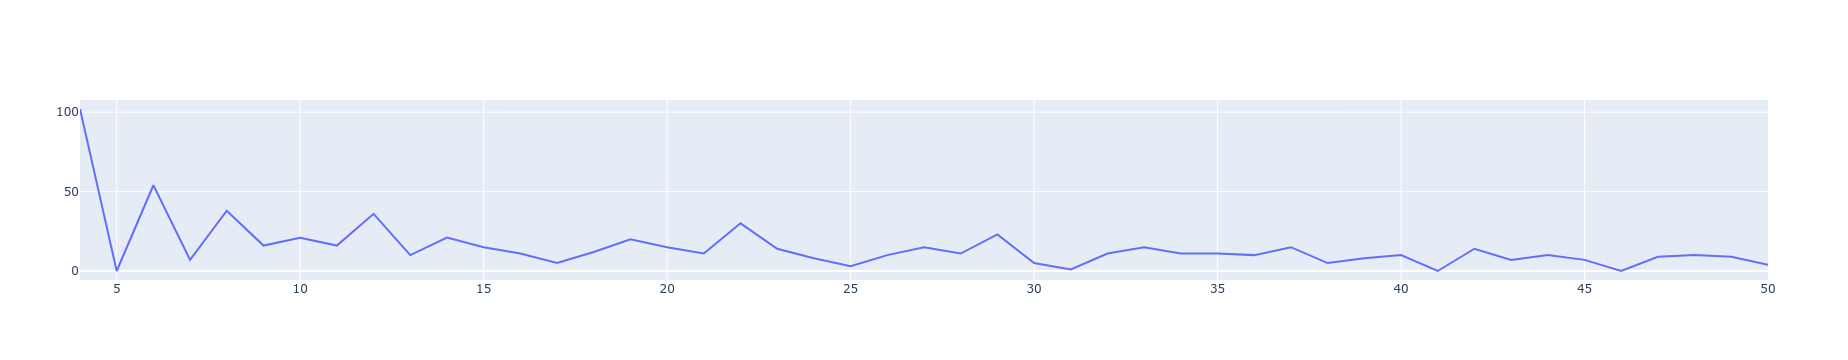

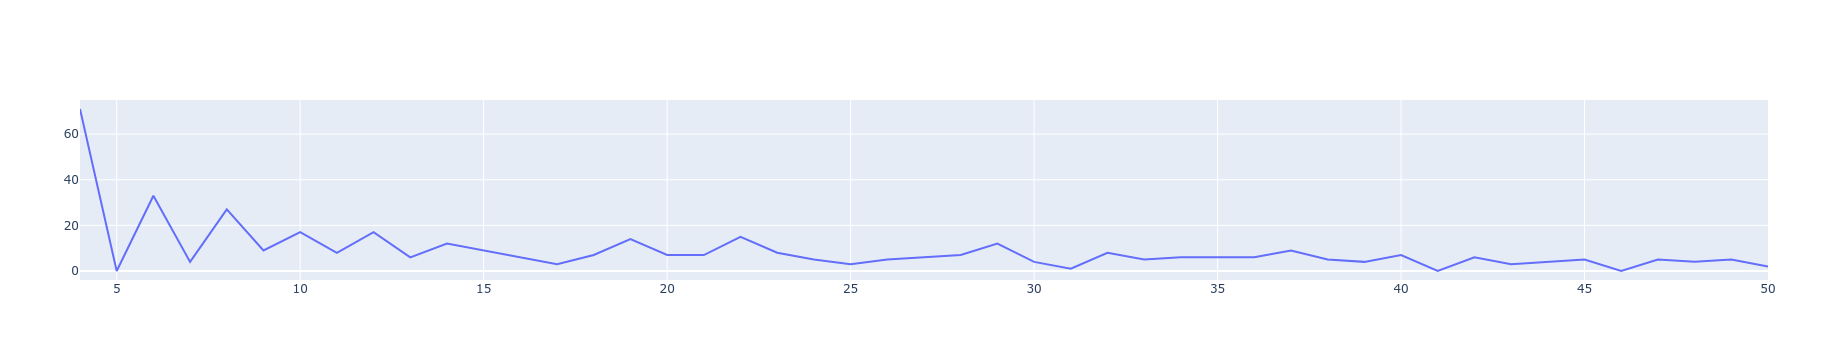

In [11]:
syntheticTaut = synthetic[synthetic["formulaIsTautology"]==1]
graphDataQuality(syntheticTaut)

syntheticTaut1 = synthetic1[synthetic1["formulaIsTautology"]==1]
graphDataQuality(syntheticTaut1)

In [ ]:
graphColsMean(out, ys=["sizeTreeTStar", "sizeTreeLabel"], yLog=False)
graphColsMean(out_neg, ys=["sizeTreeTStar", "sizeTreeLabel"], yLog=False)
graphColsMean(synthetic, ys=["sizeTreeTStar", "sizeTreeLabel"], yLog=False)

In [ ]:
graphColsMean(out, ys=["depthTreeTStar", "depthTreeLabel"], yLog=False)
graphColsMean(out_neg, ys=["depthTreeTStar", "depthTreeLabel"], yLog=False)
graphColsMean(synthetic, ys=["depthTreeTStar", "depthTreeLabel"], yLog=False)